In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [2]:
def forest_variables(total_data, productEncoder):
    prices = total_data['price']
    sales = total_data['sales']
    sizes = total_data['size']
    months = total_data['month']
    simulprom = total_data['simul_promotions']
    subst_prom = total_data['substitute_promotions']
    days_inbetween = total_data['days_inbetween']
    holidays = total_data['holiday']
    products = np.array(total_data['product']).reshape(-1, 1)
    products = productEncoder.transform(products).toarray().tolist()
    
    zipped = zip(prices, sizes, days_inbetween, months, subst_prom, simulprom, holidays)
    x_variables = [list(a) for a in zipped]
    x_variables = list(map(list.__add__, x_variables, products))
    y_variables = sales
    
    return x_variables, y_variables

In [3]:
# load model
rfr = joblib.load("./random_forest/best_model.joblib")

# Load train and test data set
train_df = pd.read_csv('./test_train_data/train.csv')
test_df = pd.read_csv('./test_train_data/test.csv')

In [4]:
unique_products = train_df['product'].unique().reshape(-1, 1)

productEncoder = OneHotEncoder(dtype=int).fit(unique_products)
productEncoder = productEncoder.fit(unique_products)

X_train, y_train = forest_variables(train_df, productEncoder)
X_test, y_test = forest_variables(test_df, productEncoder)

In [5]:
# Predict here
y_pred = rfr.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [6]:
rmse

7.10899319577977

# Visualization

In [47]:
from matplotlib import pyplot as plt

In [8]:
def forest_variables_single_product(product_data, productEncoder):
    prices = product_data['price']
    sales = product_data['sales']
    sizes = product_data['size']
    months = product_data['month']
    simulprom = product_data['simul_promotions']
    subst_prom = product_data['substitute_promotions']
    days_inbetween = product_data['days_inbetween']
    holidays = product_data['holiday']
    products = np.array(product_data['product']).reshape(-1, 1)
    products = productEncoder.transform(products).toarray().tolist()
    
    zipped = zip(prices, sizes, days_inbetween, months, subst_prom, simulprom, holidays)
    x_variables = [list(a) for a in zipped]
    x_variables = list(map(list.__add__, x_variables, products))
    y_variables = sales
    
    return x_variables, y_variables

In [9]:
unique_products = train_df['product'].unique().reshape(-1, 1)

productEncoder = OneHotEncoder(dtype=int).fit(unique_products)
productEncoder = productEncoder.fit(unique_products)

rmse = []
products = []

for product in unique_products.reshape(-1):
    products.append(product)
    
    product_df = test_df[test_df['product'] == product]
    x_test, y_test = forest_variables_single_product(product_df, productEncoder)
    
    # Predict here
    y_pred = rfr.predict(x_test)
    product_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    rmse.append(product_rmse)

In [10]:
rmse = np.around(rmse)
rmse

array([ 3.,  8.,  7.,  6.,  7.,  5.,  5.,  6.,  5., 10.,  8.,  9.,  6.,
        4.,  5.,  9.,  6., 10., 12.,  7.,  8.,  6., 10.,  7.,  8.,  8.,
        6.,  6.,  7.,  4.,  4., 10.,  6.,  7.,  7.])

In [11]:
products

['Biologische rode kool',
 'Rucola',
 'Witlof',
 'Basis sperziebonen',
 'Basis erwten zeer fijn',
 'Biologische cherry tomaten',
 'Biologische Bloemkool',
 'Basis Maiskorrels',
 'Paprika',
 'Pompoen stukjes',
 'Buitenbeentjes paprika',
 'Courgette',
 'Nasi bami Vegetable',
 'Biologische knoflook',
 'Biologische courgette',
 'WokVegetable thais',
 'SnoepVegetable tomaat',
 'Spruiten',
 'Buitenbeentjes komkommer',
 'Basis Rode kool met appel',
 'Geschrapte worteltjes',
 'SnoepVegetable worteltjes',
 'Snijbonen',
 'Komkommer',
 'Boerenkool gesneden',
 'Basis worteltjes fijn',
 'Wortelen',
 'Biologische brocolli',
 'Basis Sperziebonen',
 'Biologische prei',
 'Biologische pompoen',
 'Verse zuurkool',
 'Biologische kikkererwten',
 'Buitenbeentjes puntpaprika',
 'Paprika Mix']

In [12]:
waste_df = pd.read_csv('./derivative_data/waste_03pm.csv')
waste = waste_df.filter(products)

useful_products = []
useful_rmse = []
for idx, waste in enumerate(waste_vegatables):
    if waste_vegatables[idx] > rmse[idx]:
        useful_rmse.append(rmse[idx])
        useful_products.append(products[idx])

In [36]:
waste_vegatables = np.around(waste.mean().reindex(useful_products).tolist())

In [14]:
waste_vegatables

array([13.,  7.,  6.,  7.,  8., 11., 11., 11.,  4.,  6.,  4.,  5.,  5.,
       11., 14.,  5.,  7.,  5.,  5., 10.,  6., 10.,  5.,  7.,  7.,  6.,
        5., 13.,  6., 13., 12.,  5., 11.,  5.,  3.])

In [39]:
useful_products

array(['Biologische rode kool', 'Basis sperziebonen',
       'Basis erwten zeer fijn', 'Biologische cherry tomaten',
       'Biologische Bloemkool', 'Basis Maiskorrels',
       'Biologische knoflook', 'Biologische courgette',
       'SnoepVegetable tomaat', 'Basis Rode kool met appel',
       'SnoepVegetable worteltjes', 'Biologische brocolli',
       'Biologische prei', 'Biologische pompoen',
       'Biologische kikkererwten'], dtype='<U26')

In [16]:
waste_df = pd.read_csv('./derivative_data/waste_03pm.csv')
waste = waste_df.filter(products)

In [17]:
waste.sum().reindex(useful_products).sort_values()

Basis sperziebonen             724.0
SnoepVegetable tomaat          753.0
Basis erwten zeer fijn         872.0
SnoepVegetable worteltjes      995.0
Basis Rode kool met appel     1017.0
Biologische kikkererwten      1085.0
Biologische knoflook          1096.0
Basis Maiskorrels             1120.0
Biologische Bloemkool         1131.0
Biologische cherry tomaten    1180.0
Biologische pompoen           1219.0
Biologische rode kool         1341.0
Biologische prei              1378.0
Biologische brocolli          1383.0
Biologische courgette         1416.0
dtype: float64

In [27]:
top6 = waste.sum().sort_values().nlargest(6).index

In [35]:
top6

Index(['Biologische courgette', 'Biologische brocolli', 'Biologische prei',
       'Biologische rode kool', 'Biologische pompoen',
       'Biologische cherry tomaten'],
      dtype='object')

In [30]:
indices = [j for i, _ in enumerate(top6) for j, _ in enumerate(useful_products) if top6[i] == useful_products[j]]

In [34]:
useful_rmse[indices]

array([5., 6., 4., 3., 4., 5.])

In [38]:
waste_vegatables[indices]

array([14., 13., 13., 13., 12., 11.])

In [109]:
stacked = np.stack([useful_rmse[indices], waste_vegatables[indices]], axis = 1)
bar_df = pd.DataFrame(stacked, top6, ['Random forest', 'Reality'])
bar_df

,Random forest,Reality
Biologische courgette,5.0,14.0
Biologische brocolli,6.0,13.0
Biologische prei,4.0,13.0
Biologische rode kool,3.0,13.0
Biologische pompoen,4.0,12.0
Biologische cherry tomaten,5.0,11.0


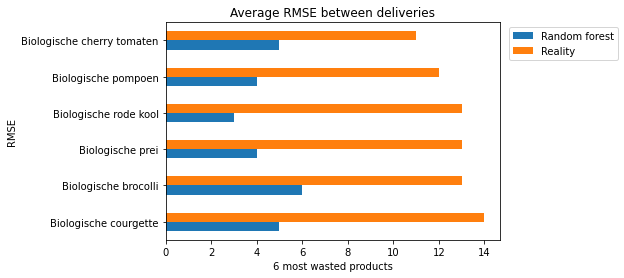

In [110]:
bar_df.plot(kind="barh")
plt.title("Average RMSE between deliveries")
plt.xlabel("6 most wasted products")
plt.ylabel("RMSE")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

In [50]:
waste_vegatables

array([13.,  7.,  8., 11., 11., 11., 11., 14.,  7., 10., 10., 13., 13.,
       12., 11.])

In [71]:
saved = waste_vegatables - useful_rmse

In [116]:
saved

array([10.,  1.,  1.,  6.,  6.,  5.,  7.,  9.,  1.,  3.,  4.,  7.,  9.,
        8.,  5.])

In [117]:
useful_products

['Biologische rode kool',
 'Witlof',
 'Basis sperziebonen',
 'Basis erwten zeer fijn',
 'Biologische cherry tomaten',
 'Biologische Bloemkool',
 'Basis Maiskorrels',
 'Paprika',
 'Buitenbeentjes paprika',
 'Courgette',
 'Nasi bami Vegetable',
 'Biologische knoflook',
 'Biologische courgette']

In [85]:
saved_df = pd.DataFrame(saved * waste.shape[0], useful_products)
saved_df = saved_df.sort_values(by = [0], ascending=False)

Text(0, 0.5, 'Product name')

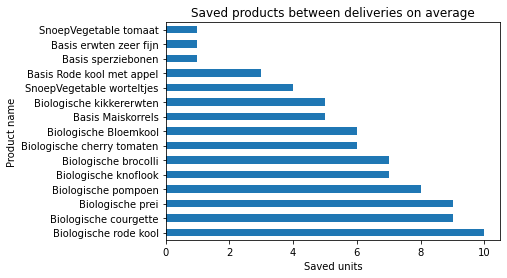

In [98]:
saved_df.plot(kind="barh", legend=None)
plt.title("Saved products between deliveries on average")
plt.xlabel("Saved units")
plt.ylabel("Product name")

In [118]:
saved_df

,0
Biologische rode kool,10.0
Biologische courgette,9.0
Biologische prei,9.0
Biologische pompoen,8.0
Biologische knoflook,7.0
Biologische brocolli,7.0
Biologische cherry tomaten,6.0
Biologische Bloemkool,6.0
Basis Maiskorrels,5.0
Biologische kikkererwten,5.0


In [103]:
saved_df_year = saved_df * waste.shape[0] - 1

Text(0, 0.5, 'Product name')

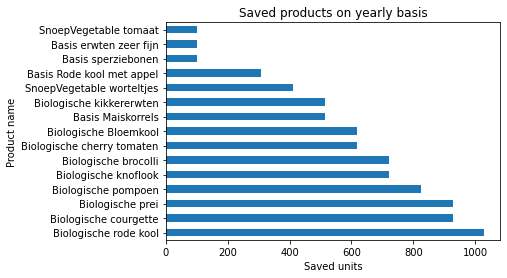

In [105]:
saved_df_year.plot(kind="barh", legend=None)
plt.title("Saved products on yearly basis")
plt.xlabel("Saved units")
plt.ylabel("Product name")

In [108]:
saved_df_year.sum()

0    8431.0
dtype: float64

In [111]:
waste_df = pd.read_csv('./derivative_data/waste_03pm.csv')
waste = waste_df.filter(products)

useful_products = []
useful_rmse = []
for idx, waste in enumerate(waste_vegatables):
    if waste_vegatables[idx] > rmse[idx]:
        useful_rmse.append(rmse[idx])
        useful_products.append(products[idx])

In [112]:
useful_products

['Biologische rode kool',
 'Witlof',
 'Basis sperziebonen',
 'Basis erwten zeer fijn',
 'Biologische cherry tomaten',
 'Biologische Bloemkool',
 'Basis Maiskorrels',
 'Paprika',
 'Buitenbeentjes paprika',
 'Courgette',
 'Nasi bami Vegetable',
 'Biologische knoflook',
 'Biologische courgette']

In [114]:
waste_df

,day,Komkommer,Courgette,SnoepVegetable tomaat,Paprika Mix,Paprika,Geschrapte worteltjes,Basis Sperziebonen,Basis Rode kool met appel,Basis worteltjes fijn,...,Roomboter chocolade brood,Chinois brioche,Vanille muffins (vers),Basic chocolate chip cookies,Oreo,Bakkersspeculaas,Eierkoeken,Ribbelchips naturel,Ribbelchips paprika,Doritos sweet chili
0,0,0.0,0.0,0.0,0.0,6.0,4.0,3.0,0.0,0.0,...,0.0,4.0,30.0,0.0,0.0,6.0,0.0,2.0,0.0,3.0
1,3,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,10.0,...,3.0,12.0,19.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
2,7,0.0,0.0,8.0,30.0,0.0,0.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,11.0
3,10,0.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,3.0,...,0.0,2.0,7.0,3.0,6.0,0.0,9.0,1.0,16.0,4.0
4,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,343,23.0,12.0,24.0,8.0,4.0,3.0,13.0,14.0,27.0,...,3.0,14.0,16.0,14.0,11.0,3.0,0.0,4.0,2.0,18.0
99,346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,350,0.0,15.0,1.0,5.0,7.0,0.0,17.0,0.0,25.0,...,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
101,353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [115]:
test_df

,Unnamed: 0,index,month,size,price,sales,simul_promotions,days_inbetween,substitute_promotions,holiday,category,product
0,1672,24,3,0,0.89,15,0,3,0.0,0,vegetable,Basis Sperziebonen
1,1690,42,5,0,0.89,23,0,3,0.0,0,vegetable,Basis Sperziebonen
2,3154,64,8,0,0.69,12,0,3,0.0,0,vegetable,Biologische knoflook
3,71,71,9,0,1.29,33,0,4,0.0,0,vegetable,Boerenkool gesneden
4,984,57,7,0,2.99,36,0,4,0.0,0,vegetable,Buitenbeentjes paprika
...,...,...,...,...,...,...,...,...,...,...,...,...
895,3361,65,8,0,1.99,37,0,4,0.0,0,vegetable,WokVegetable thais
896,817,96,12,0,2.09,25,0,3,0.0,0,vegetable,Snijbonen
897,3100,10,2,0,0.69,12,0,3,0.0,0,vegetable,Biologische knoflook
898,1070,40,5,0,0.89,15,0,3,1.0,0,vegetable,Basis sperziebonen
